# <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 1: Programming Assignments</p>
## <p style="text-align: center;">Total points: 65  </p>
## <p style="text-align: center;">Due: Feb 16 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

As a general practice, in case of theretical questions (e.g., computation of gradients), the most convenient way of providing an answer is to type it in the provided spaces (markdown cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a phousing file of the scan/photo.

# <font color='blue'> Problem 3: Perceptron (20 pts) </font>

## Download data
In this problem, we will use the Iris flower dataset https://www.kaggle.com/arshid/iris-flower-dataset. This dataset contains 4 features (Petal Length, Petal Width, Sepal Length, Sepal Width) that characterize flowers and classify them as belonging to one of 3 classes. For the sake of simplicity of this exercise, we strip the last 100 rows of the dataset so as to exclude the class ‘Iris-virginica’, and proceed by using only 2 classes: ‘Iris-setosa’ and ‘Iris-versicolor’.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=2)

In [39]:
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # filter out one class of the dataset and take the last 100 rows
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data

data = load_data()
print(data)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5

## (a) Visualize data (5 pts)
Plot the data with 2-D scatter (see an example below), using different colors to represent points in different classes.

1. Y: petal length, X: sepal length; 

2. Y: petal width, X: sepal width; 

3. Y: petal length, X: petal width; 

4. Y: sepal length, X: sepal width.

## Example:

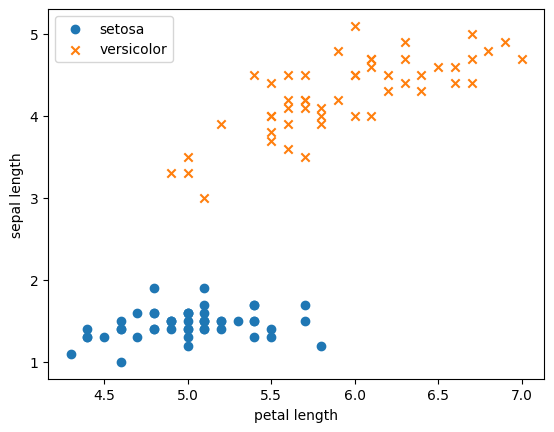

In [40]:
# 1 Y: petal length, X: sepal length
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()


## Your turn: Please show other scatter plots:

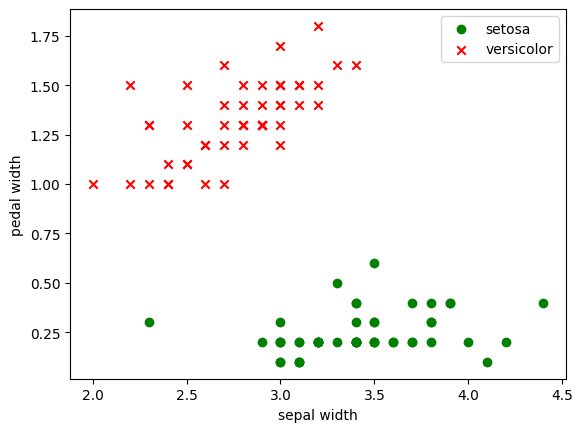

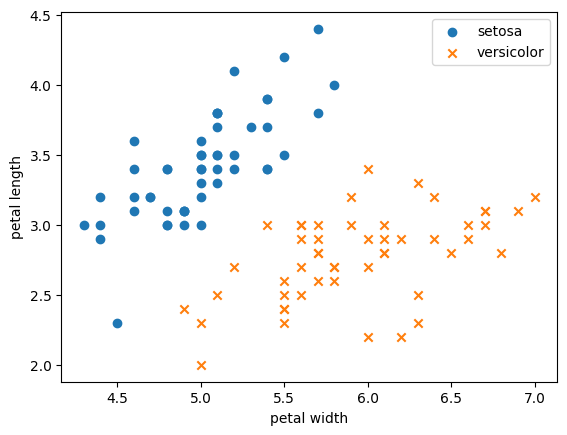

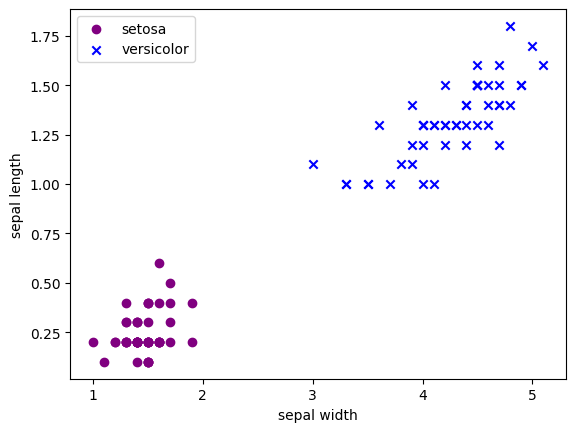

In [42]:
# 2 Y: petal width, X: sepal width
plt.scatter(np.array(data[:50,1]), np.array(data[:50,3]), marker='o', label='setosa', c='green')
plt.scatter(np.array(data[50:,1]), np.array(data[50:,3]), marker='x', label='versicolor', c='red')
plt.xlabel('sepal width')
plt.ylabel('pedal width')
plt.legend()
plt.show()
# 3 Y: scale_x = petal length, X: petal width
plt.scatter(np.array(data[:50,0]), np.array(data[:50,1]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,1]), marker='x', label='versicolor')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()
plt.show()
# 4 Y: sepal length, X: sepal width
plt.scatter(np.array(data[:50,2]), np.array(data[:50,3]), marker='o', label='setosa', c='purple')
plt.scatter(np.array(data[50:,2]), np.array(data[50:,3]), marker='x', label='versicolor', c='blue')
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## (b) Program the Perceptron algorithm (8 pts)

In [81]:
def perceptron(data, num_iter):
    # Reshape the data and the labels
    features = data[:, :-1]
    #pp.pprint(features)
    labels = data[:, -1]
    #pp.pprint(labels)
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)    
    return (w, misclassified_)

In [82]:
num_iter=5
w, misclassified_ = perceptron(data, num_iter)

## (c) Plot the fraction of misclassified points  vs. iterations (4 pts)

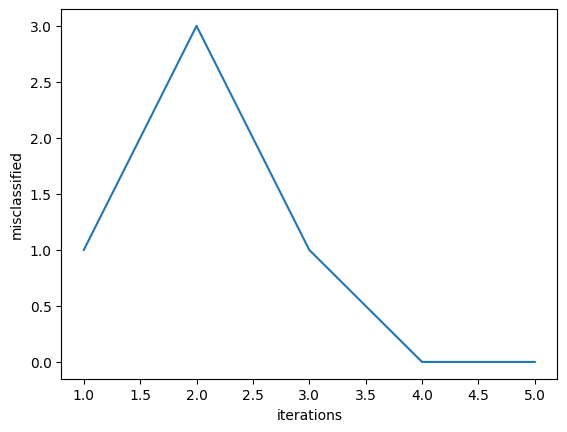

In [83]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

# (d) Limitation (3 pts)
Write down what you think are the limitation of the Perceptron Learning Algorithm.

1. This will only work when comparing two classes (Binary Classifier), it could be extended to 
2. Single layer preceptions will only converge if the data is linearly seperable

# <font color='blue'> Problem 4: Linear Regression (20 pts) </font>

In this problem, we will use linear regression to predict house prices. The data (which we will load as a pandas dataframe) is in Housing.csv file that you can download from Canvas.

## Import standard libraries and load data

In [46]:
# from google.colab import files
# uploaded = files.upload()

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# data visualization:
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
import os 
pwd = os.getcwd()
housingFile = pwd + "/Housing.csv"
housing = pd.DataFrame(pd.read_csv(housingFile))
pp.pprint(housing.keys())
housing.isnull().sum
original_housing = housing.copy(deep=True)
print(original_housing.head())

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no         

## (a) Data exploration (4 pts)

First, explore the data and generate its descriptive statistics. [Hint: showing housing.head(), housing.info() and housing.describe() may be helpful. More on pandas.DataFrame can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.] 

Are any data entries missing, i.e., do we have to perform data imputation? Note that missing data (null values) in pandas datasets are represented by 'None' and 'nan' data types. [Hint: *housing.isnull()* implements a mask where null values are flagged as 'True' or '1', while rest of the entries are labeled as '0'; the number of missing values for each column (features) is given by *housing.isnull().sum()* where *.sum()* implements a columnwise sum.]

There are no null values in the dataset, to my knowledge for predicting the home price 

In [47]:
housing.isnull()
housing.head()
housing.info()
housing.describe()
pp.pprint(housing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no     

## (b) Data visualization (4 pts)

Use sns.pairplot(housing) to plot pairwise relationships between numerical data in the set (see https://seaborn.pydata.org/generated/seaborn.pairplot.html for more details). Which variable seems to be the most correlated with price?

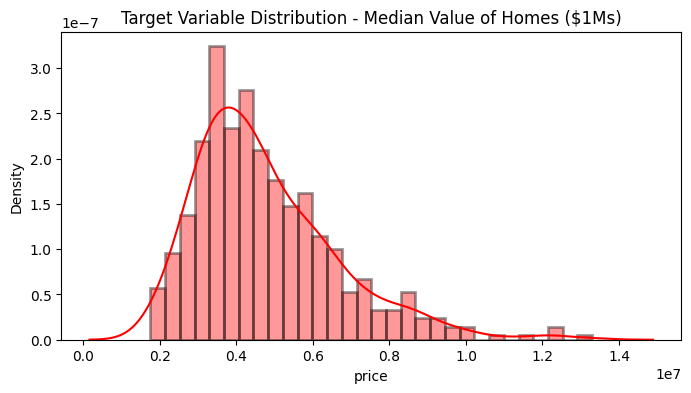

In [48]:
plt.figure(figsize=[8,4])
sns.distplot(housing['price'], color='r',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()


## Additional proceesing: Transforming categorical variables to numerical ones
To solve linear regression, we need to convert categorical variables into numerical form. This is what the code below will do for you.

In [49]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing = housing.replace({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
pp.pprint(housing)
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
pp.pprint(housing)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

## More additional processing: Separating data from its labels/values, conversion to numpy

Another tidbit that is already coded. Y denotes the price, X is the data matrix. Conversion to numpy arrays is done using *.to_numpy()* function. 

## (c) Split data into training and testing sets (2 pts)

Look up the train test split function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html to obtain X_train, X_test, Y_train, Y_test ($80 \%$ of the overall data is to be used for training).

In [62]:
Y=housing['price'].to_numpy() 
print(Y.shape)
X=housing.drop('price',axis=1).to_numpy()

# Augment $X$ with a column of all ones (facilitating bias term):
print(X.shape)
X=np.hstack((np.ones((np.shape(X)[0],1)),X))
print(X.shape)


(545,)
(545, 12)
(545, 13)


In [51]:
from sklearn.model_selection import train_test_split
# Get data into x and y first and then split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',
      X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (545, 13) (545,) 
Training set  --->  (436, 13) (436,) 
Testing set   --->  (109, 13)  (109,)


## (d) Perform regression (6 pts)

In class we derived the formula for one-shot learning of the weight vector w that minimizes the mean-square error of the linear fit to data. Implement/program that procedure below and print the resulting w, along with the mean-square errors on both training and testing data.

Hints: *np.matmul()* can be used to perform matrix multiplication. Transpose of an array is found as *.T*, e.g., *X_train.T* . Matrix inverse can be implemented using *np.linalg.inv()*. Finally, if A and B are two numpy arrays, then $||A-B||_2$ can be obtained by *np.sqrt(sum((A-B)**2)/np.shape(A)[0])*.

In [57]:
# Distance Metric 
# d^2(x1,x2) = ||f(x1)-f(x2)||2
import numpy as np

def one_shot_learning(X_train, y_train, X_test, y_test):
    # Add bias term to the features
    pp.pprint(y_train[0:4])
    pp.pprint(y_train[0])
    #X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    #X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Compute the weight vector using one-shot learning formula
    w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    
    # Calculate predictions
    y_train_pred = X_train.dot(w)
    pp.pprint(y_train_pred[0:4])

    y_test_pred = X_test.dot(w)
    
    # Compute mean square errors
    mse_train = np.mean((y_train - y_train_pred)**2)
    mse_test = np.mean((y_test - y_test_pred)**2)
    
    return w, mse_train, mse_test, y_train_pred, y_test_pred


# Example usage
# Generate some random linear data for demonstration purposes
#np.random.seed(0)
#X_train = 2 * np.random.rand(100, 1)
#y_train = 4 + 3 * X_train + np.random.randn(100, 1)
#X_test = 2 * np.random.rand(20, 1)
#y_test = 4 + 3 * X_test + np.random.randn(20, 1)

# Apply one-shot learning
w, mse_train, mse_test, y_train_pred, y_test_pred = one_shot_learning(X_train, y_train, X_test, y_test)

print("Weight vector w:", w)
print("Mean square error on training data:", mse_train)
print("Mean square error on testing data:", mse_test)


array([1750000, 2695000, 2870000, 2590000])
1750000
array([2633672.55140826, 2730090.80032145, 2051523.91507425,
       2628597.90672862])
Weight vector w: [-4.06907463e+05  2.53732234e+02  1.26430216e+05  1.00306572e+06
  4.31159234e+05  4.34983941e+05  3.95198712e+05  3.30288607e+05
  1.20896581e+06  8.59967238e+05  2.20086777e+05  6.93749764e+05
  2.55656836e+05]
Mean square error on training data: 1162498690718.857
Mean square error on testing data: 986041803890.0272


## (e) Plot and analyze the results (4 pts)

Use plt.scatter (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to obtain a scatter plot for predicted price against true price for both training and testing data on the same plot.  Furthermore, use *np.corrcoef()* https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html  and state the correlation coefficient between the predicted price and true price for train and validation sets. Comment on the performance of the model based on the scatter plot and the correlation coefficient.

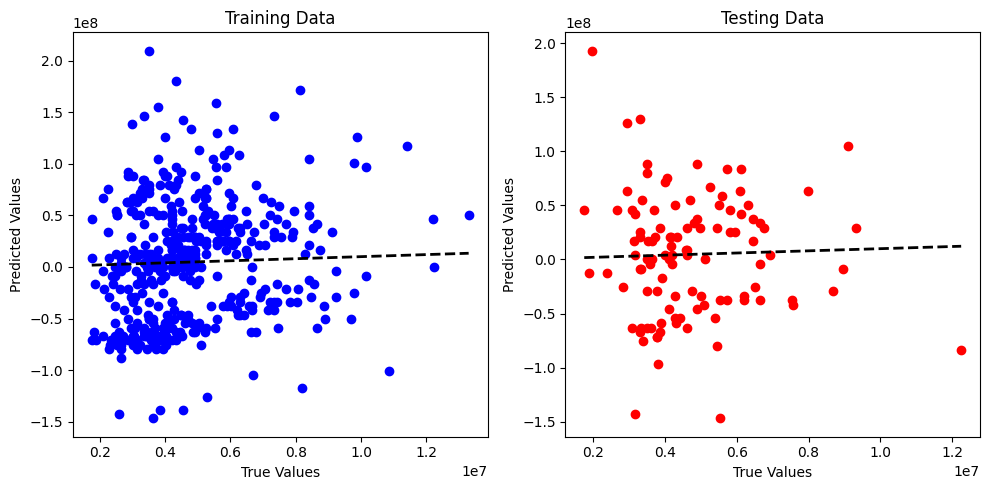

Correlation coefficient for training data: 0.1740110849167781
Correlation coefficient for testing data: -0.04919747766635839


In [34]:
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Testing Data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Correlation coefficient
corr_train = np.corrcoef(y_train.squeeze(), y_train_pred.squeeze())[0, 1]
corr_test = np.corrcoef(y_test.squeeze(), y_test_pred.squeeze())[0, 1]

print("Correlation coefficient for training data:", corr_train)
print("Correlation coefficient for testing data:", corr_test)

# <font color='blue'> Problem 5: Logistic regression on MNIST (25 pts) </font>

In this problem, we use the MNIST dataset (https://www.kaggle.com/datasets/hojjatk/mnist-dataset) which allows us to explore real-world data while spending minimal effort on preprocessing and formatting. We will observe that parameter tuning can greatly accelerate and improve a machine learning algorithm. 

### Downloading the data (MNIST)

In [63]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import os
import pprint 
pp = pprint.PrettyPrinter(indent=2)
import numpy as np
pwd = os.getcwd()
print("Data saved to: " + pwd)
# Change data_home to wherever to where you want to download your data
X_pandas, y_pandas = fetch_openml('mnist_784', data_home=pwd, parser='auto',return_X_y=True )
X = X_pandas.to_numpy()
y = y_pandas.to_numpy()
print("mnist data shape: " + str(X.shape))
print("mnist target shape: " + str(y.shape))
print("10 Classes:" + str(np.unique(y)) +"\n")


Data saved to: /home/pabs/GitRepos/UT_Grad_School/statistical-machine-learning/hw1
mnist data shape: (70000, 784)
mnist target shape: (70000,)
10 Classes:['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



Having loaded the dataset, you can complete the tasks below.

### 1. Print shapes of input images and labels. (2 pts)

"\nfirst_image = mnist.data[0]\nfirst_image = np.array(first_image, dtype='float')\npixels = first_image.reshape((28, 28))\nplt.imshow(pixels, cmap='gray')\nplt.show()\n"

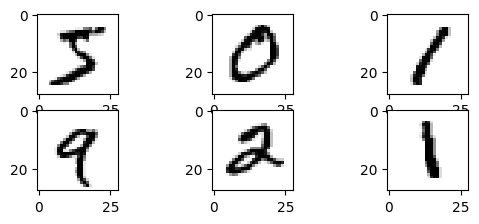

In [64]:
from matplotlib import pyplot as plt
import numpy as np
image = X
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
'''
first_image = mnist.data[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
'''

### 2. Split data into training and test sets and print the shapes of both. The test size should be 0.25. Random state should be 0. (3 pts)

In [65]:
from sklearn.model_selection import train_test_split
# Get data into x and y first and then split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("X_train: " + str(X_train.shape) +"\t y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape) +"\t y_test: " + str(y_test.shape))

X_train: (52500, 784)	 y_train: (52500,)
X_test: (17500, 784)	 y_test: (17500,)


### 3. Show a few images and the corresponding labels. (2 pts)

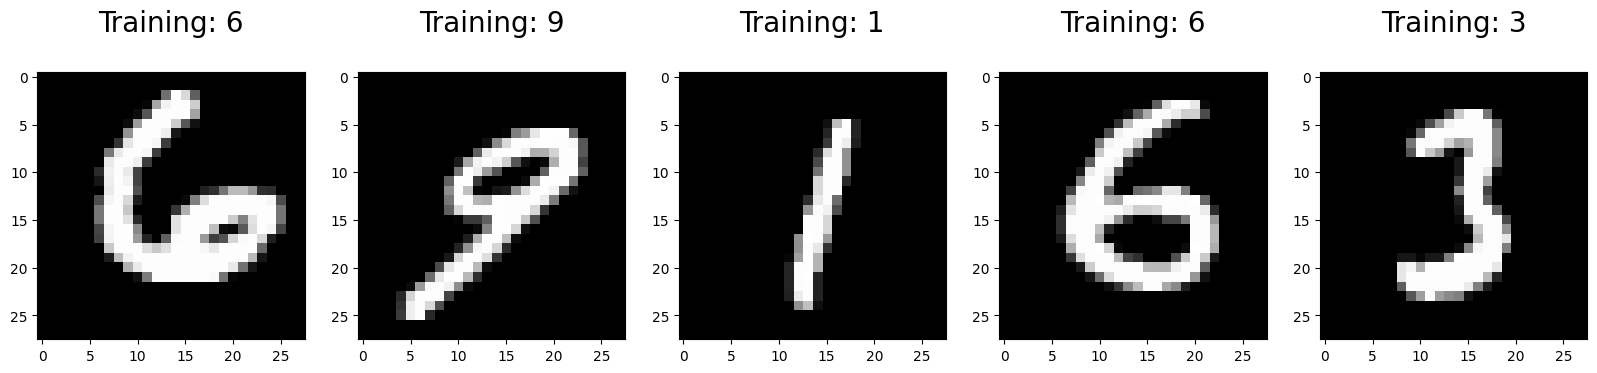

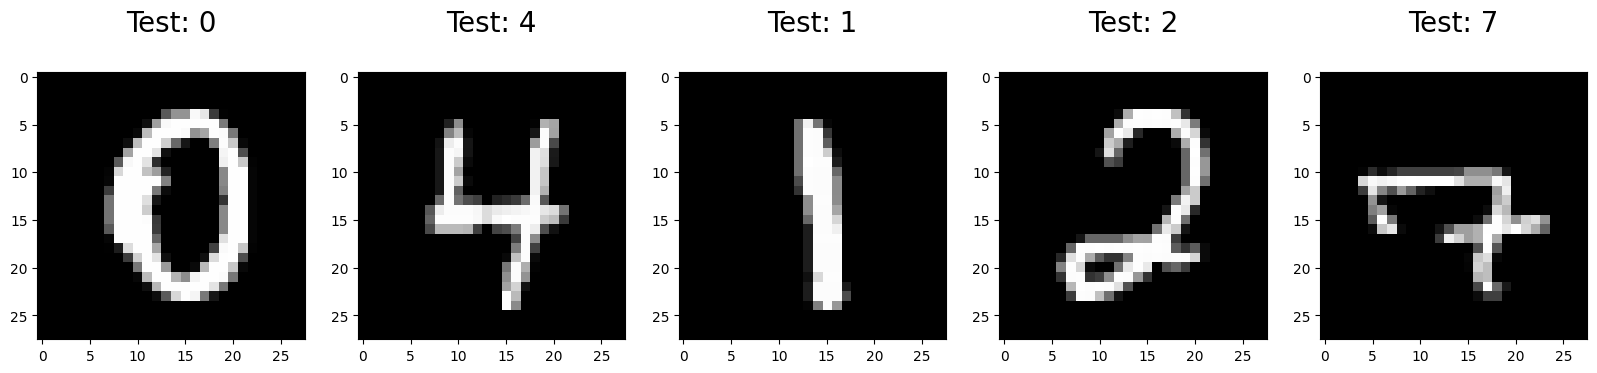

In [66]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20);

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Test: %s\n' % label, fontsize = 20);

### 4. The main part of the code (12 pts)
a. Import the logistic regression model.\
b. Make an instance of the model.\
c. Train the model on data, store the information learned.\
d. Predict the labels of test data.

In [67]:
# Aplly standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Import the model and create an instance
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs',
                        max_iter=2000,
                        verbose=True)
print("Model: " + str(clf))

clf.fit(X_train, y_train)

print("Done")

Model: LogisticRegression(max_iter=2000, verbose=True)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20886D+05    |proj g|=  8.81141D+03


 This problem is unconstrained.



At iterate   50    f=  1.08677D+04    |proj g|=  4.99608D+01

At iterate  100    f=  1.03158D+04    |proj g|=  1.89509D+01

At iterate  150    f=  1.01882D+04    |proj g|=  1.14037D+01

At iterate  200    f=  1.01493D+04    |proj g|=  5.63140D+00

At iterate  250    f=  1.01352D+04    |proj g|=  4.10062D+00

At iterate  300    f=  1.01293D+04    |proj g|=  1.09338D+01

At iterate  350    f=  1.01262D+04    |proj g|=  1.66739D+00

At iterate  400    f=  1.01247D+04    |proj g|=  2.73754D+00

At iterate  450    f=  1.01239D+04    |proj g|=  2.24201D+00

At iterate  500    f=  1.01235D+04    |proj g|=  6.47775D-01

At iterate  550    f=  1.01232D+04    |proj g|=  5.54337D-01

At iterate  600    f=  1.01231D+04    |proj g|=  3.96357D-01

At iterate  650    f=  1.01230D+04    |proj g|=  1.99346D-01

At iterate  700    f=  1.01230D+04    |proj g|=  1.54054D-01

At iterate  750    f=  1.01230D+04    |proj g|=  1.35991D-01

At iterate  800    f=  1.01230D+04    |proj g|=  6.77014D-02

At iter

### 5. Print the classification report (specifically, the class-wise Precision, Recall and F1-score). More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). (3 pts)

In [72]:
from sklearn.metrics import classification_report
clf.score(X,y)
y_pred = clf.predict(X)
cr = classification_report(y,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6903
           1       0.98      0.88      0.92      7877
           2       0.96      0.76      0.85      6990
           3       0.88      0.87      0.88      7141
           4       0.89      0.92      0.90      6824
           5       0.99      0.27      0.42      6313
           6       0.93      0.94      0.93      6876
           7       0.98      0.85      0.91      7293
           8       0.51      0.97      0.67      6825
           9       0.82      0.91      0.87      6958

    accuracy                           0.84     70000
   macro avg       0.88      0.83      0.83     70000
weighted avg       0.89      0.84      0.83     70000



### 6. Display examples of misclassified images with predicted labels. (3 pts)

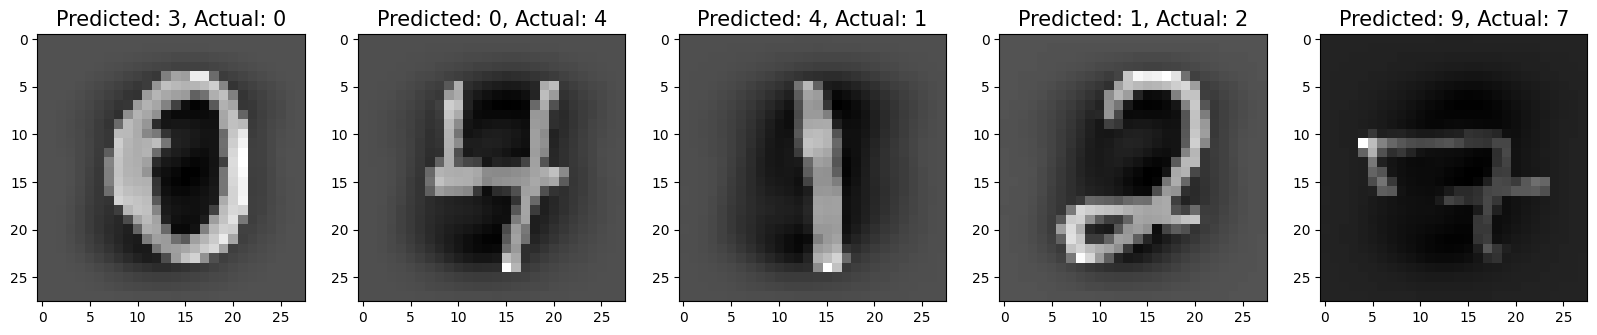

In [80]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 15)